# **Импорт важных библиотек**





In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [ ]:
#plt.style.use('dark_background')

# **Игрушечный Пример на сгенерированных данных**

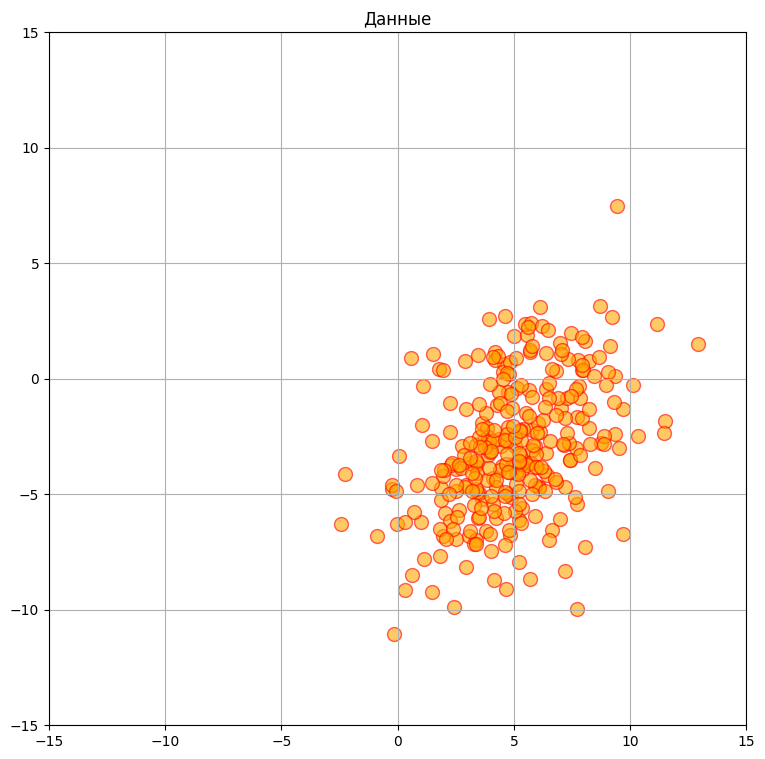

In [ ]:
#@title **Параметры распределения данных** { run: "auto" }
#@markdown ### Координаты Центра
C1 =  5 #@param {type:"slider", min:-5, max:5, step:0.1}
C2 =  -3 #@param {type:"slider", min:-5, max:5, step:0.1}
#@markdown ### "Мощность" направлений
S1 =  3 #@param {type:"slider", min:0, max:5, step:0.1}
S2 =  2 #@param {type:"slider", min:0, max:5, step:0.1}
#@markdown ### Угол наклона
theta = 55 #@param {type:"slider", min:0, max:90, step:5}
#@markdown ### Количество точек
N = 300 #@param {type:"slider", min:100, max:2000, step:100}

np.random.seed(1437)


theta = np.pi*theta/180
Centers = np.array([C1,C2])
Sigmas = np.array([S1,S2])

# Матрица поворота
R = np.array([[np.cos(theta), - np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

X = R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))

fig = plt.figure(figsize=(9,9))
plt.scatter(X[0,:],X[1,:], alpha = 0.6, label = 'данные',s = 100, c = 'orange', edgecolor = 'r')
plt.grid()
plt.xlim((-15,15))
plt.ylim((-15,15))
plt.title('Данные');


# **Применяем метод главных компонент**

In [ ]:
np.shape(X)

(2, 300)

*  Создаем объект **pca** c указанием ожидаемого числа компонент **n_components**

*  "Обучаем" метод главных компонент методом **.fit()**

*  Выполняем преобразование в пространство главных компонент методом **.transform()**

In [ ]:
pca = PCA(n_components=2)
pca.fit(X.T)
pca_result = pca.transform(X.T)

*  Собственные Вектора Хранятся в атрибуте **.components_**
*  Собственные Значения Хранятся в атрибуте **.explained_variance_**

In [ ]:
Eigen_Vectors = pca.components_
Eigen_Values = pca.explained_variance_

In [ ]:
pca.components_

array([[ 0.56332339,  0.8262365 ],
       [ 0.8262365 , -0.56332339]])

In [ ]:
pca.explained_variance_

array([10.28914863,  4.00917908])

Проверим, что полученные собственные вектора и собственные  значения действительно связаны с распределением исходных данных

Для этого выполним аффинное преобразование единичной окружности, используя собственные вектора для определения угла наклона эллипса, а собственные значения как характерный размер вдоль соответсвующей оси эллипса

In [ ]:
X_mean = np.mean(X, axis = 1)

theta_ = 2 * np.pi * np.arange(0,1,0.01)

X_std = Eigen_Vectors[[1,0]] @ np.diag(np.sqrt(Eigen_Values[[1,0]])) @ np.array([np.cos(theta_),np.sin(theta_)])



"Теория" говорит о том, что полученный эллипс должен содержать в себе распределение 68% от всех точек (1 стандартное отклонение от среднего)

При этом если оси эллипса увеличить в два раза то в таком эллипсе будет 95% точек (2 стандартных оклонений от среднего)

**Визуализация**

Выполним визуализацию исходных данных, эллипсов полученыых из собственных значений и векторов, с поправкой на среднее значение, а также базис из главных компонент

Вроде все совпадает с теорием

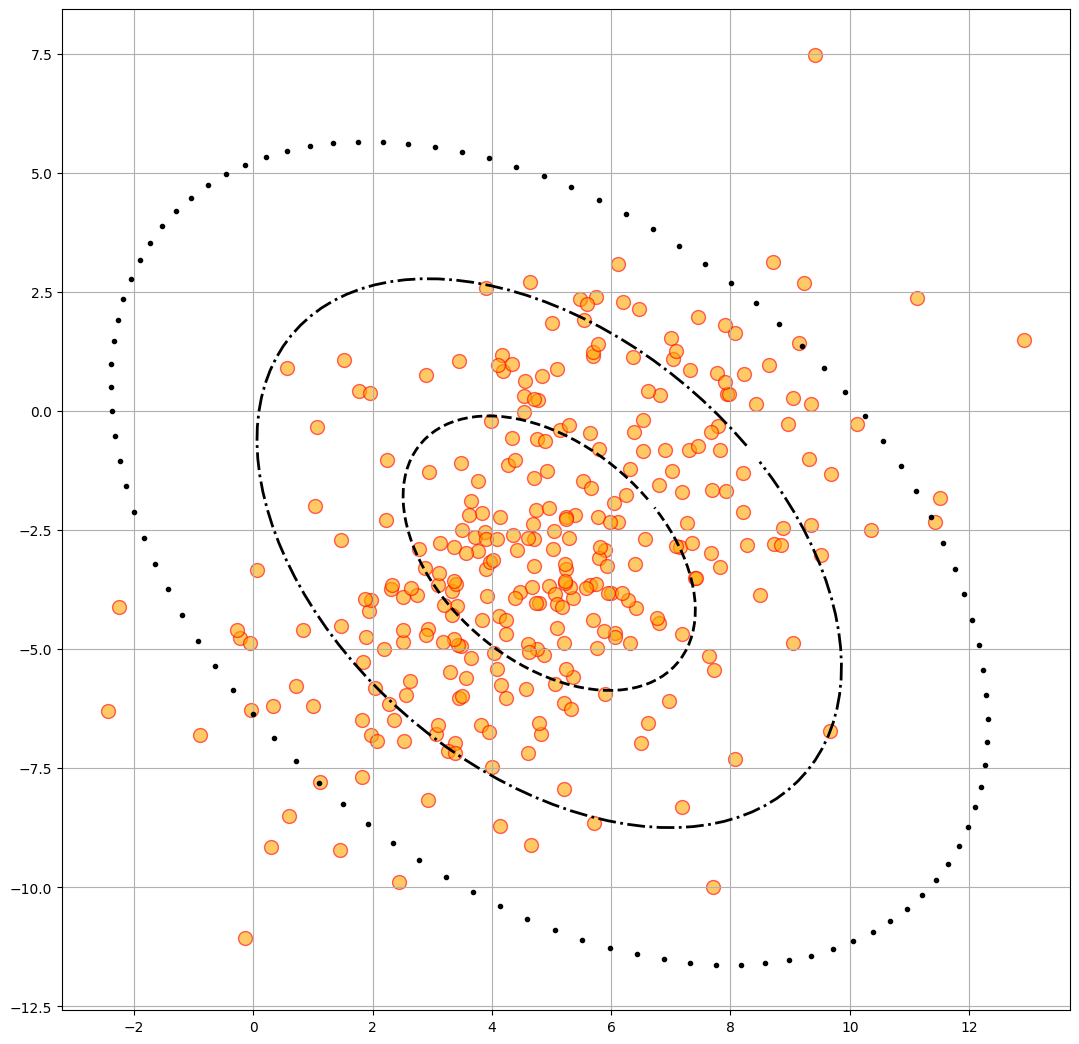

In [ ]:
fig = plt.figure(figsize=(13,13))
# рисуем данные
plt.scatter(X[0,:],X[1,:], alpha = 0.6, label = 'данные',s = 100, c = 'orange', edgecolor = 'r')
# рисуем эллипс с "диаметром" ~ 1*СКО
plt.plot(X_std[0,:]+X_mean[0],X_std[1,:]+X_mean[1],
         '--', c = 'k', linewidth = 2, label = '1*СКО')
#рисуем эллипс с "диаметром" ~ 2*СКО
plt.plot(2*X_std[0,:]+X_mean[0],2*X_std[1,:]+X_mean[1],
         '-.', c = 'k', linewidth = 2, label = '2*СКО')
#рисуем эллипс с "диаметром" ~ 3*СКО
plt.plot(3*X_std[0,:]+X_mean[0],3*X_std[1,:]+X_mean[1],
         '.', c = 'k', linewidth = 2, label = '3*СКО')
'''# 1-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,0]*np.sqrt(Eigen_Values[0])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,0]*np.sqrt(Eigen_Values[0])]),
         'g',linewidth = 3, label = '1-ая главная компонента')
# 2-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,1]*np.sqrt(Eigen_Values[1])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,1]*np.sqrt(Eigen_Values[1])]),
         'b',linewidth = 3, label = '2-ая главная компонента')'''
#plt.xlim((-5,5))
#plt.ylim((-5,5))
#plt.title('Эллипсы и главные компоненты')
#plt.legend()
plt.grid()

In [ ]:
np.cov(X)

array([[6.00202221, 2.92293866],
       [2.92293866, 8.2963055 ]])

In [ ]:
np.mean(X, axis = 1)

array([ 4.9611181 , -2.98654647])

**Пространство главных компонент**

То что лежит в переменной pca_result

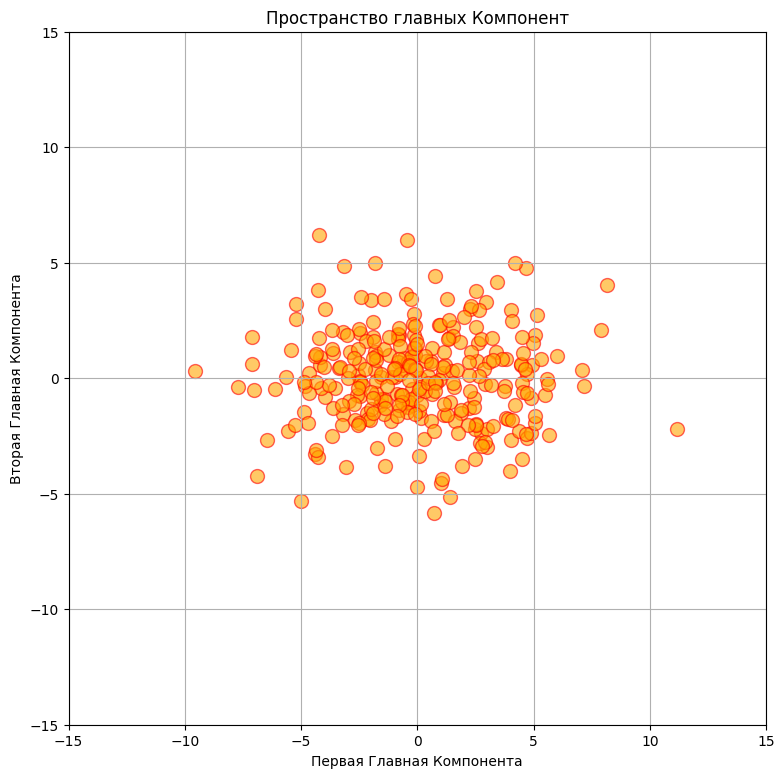

In [ ]:
fig = plt.figure(figsize=(9,9))

plt.scatter(pca_result[:,0],pca_result[:,1], alpha = 0.6, label = 'данные',s = 100, c = 'orange', edgecolor = 'r');
plt.grid()
plt.xlim((-15,15))
plt.ylim((-15,15))
plt.title('Пространство главных Компонент')
plt.xlabel('Первая Главная Компонента')
plt.ylabel('Вторая Главная Компонента');


# Мини-Задание



1.   Сгенерируйте другие данные, изменив параметры генерации данных на следующие
    
2.   Реализуйте метод главных компонент и выполните визуализацию результатов

